In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import numpy as np
from mflex.simulate.simulate_boundary import dalmatian
import matplotlib.pyplot as plt

In [5]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

b = 1.0
a = 0.22
alpha = 0.5

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin

data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dalmatian(x, y)

In [5]:
# with open("/Users/lilli/Desktop/mflex/mhsflex/testfile.npy", "wb") as file:
#     np.array([nresol_x, nresol_y, nresol_z], dtype=np.int32).tofile(file)
#     np.array([pixelsize_x, pixelsize_y, pixelsize_z], dtype=np.float64).tofile(file)
#     data_bz.tofile(file)
#     x_arr.tofile(file)
#     y_arr.tofile(file)
#     z_arr.tofile(file)

In [6]:
from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield


In [7]:
data2d = Field2dData(nresol_x, nresol_y, nresol_z, nresol_x, pixelsize_x, pixelsize_y, pixelsize_z, x_arr, y_arr, z_arr, data_bz)

In [8]:
data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

In [9]:
data3dnm = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [11]:
data3dl = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False, tanh=False)

In [2]:
from mhsflex.metrics import compare_field3d

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
compare_field3d(data3d, data3dnm)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999982345684586 (Reference value:  1.0 )
Cauchy-Schwarz metric:  4.687488263655944e-08 (Reference value:  4.6875e-08 )
Normalised vector error metric:  0.0019077195528680439 (Reference value:  0.0 )
Mean vector error metric:  9.98653279472373e-11 (Reference value:  0.0 )
Magnetic energy metric:  0.9997544576825619 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all fieldlines:  0.8117283950617284
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  1.0
-------------------------------------------------------

In [18]:
compare_field3d(data3d, data3dl)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9986531361983054 (Reference value:  1.0 )
Cauchy-Schwarz metric:  4.681855525865843e-08 (Reference value:  4.6875e-08 )
Normalised vector error metric:  0.053757027031609554 (Reference value:  0.0 )
Mean vector error metric:  2.6433265501882356e-09 (Reference value:  0.0 )
Magnetic energy metric:  0.98984646084703 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all fieldlines:  0.808641975308642
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9961977186311787
------------------------------------------

In [19]:
pathtofile = "/Users/lilli/Desktop/mflex/mhsflex/plots"

In [20]:
from mhsflex.vis import plot, plot_plasma_parameters

In [25]:
pathtofile + "/pp_variations.png"

'/Users/lilli/Desktop/mflex/mhsflex/plots/pp_variations.png'

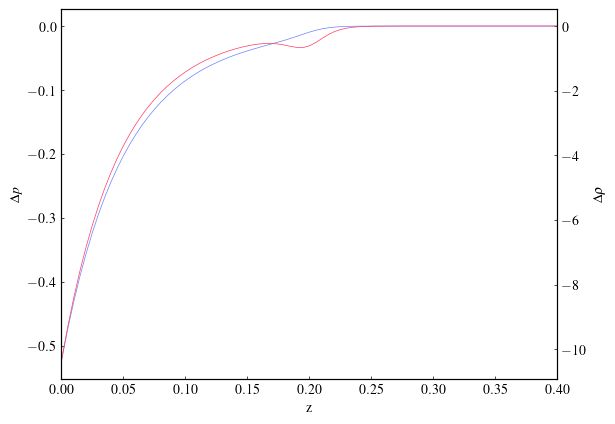

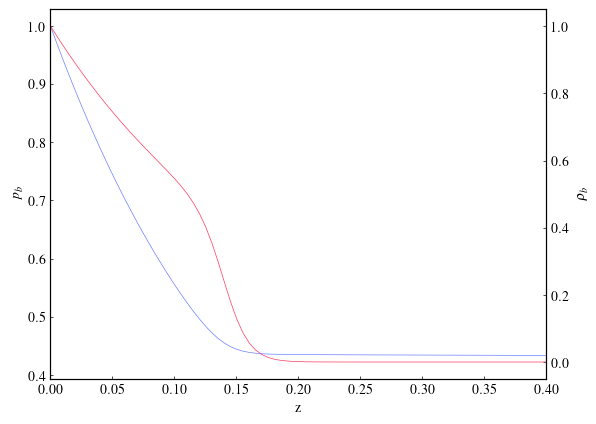

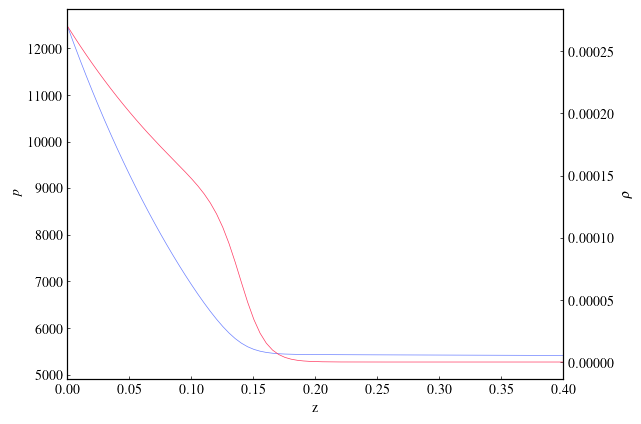

In [52]:
plot_plasma_parameters(data3dl, pathtofile)

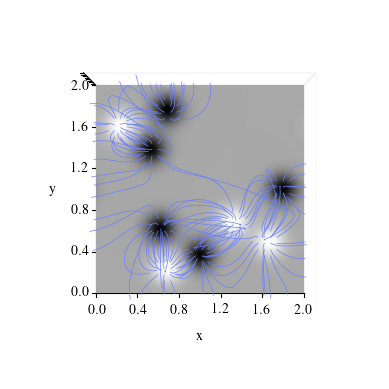

In [23]:
plot(data3d, False, 'los')

In [14]:
den = data3d.fdensity

In [16]:
pres = data3d.fpressure

In [19]:
pres.shape

(200, 200, 400)

In [17]:
import matplotlib.pyplot as plt

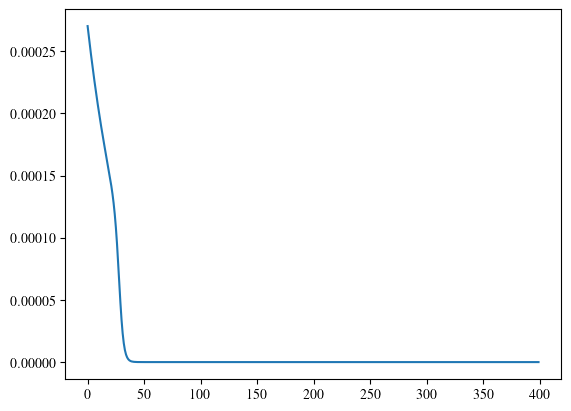

In [22]:
plt.plot(den[0,0,:])

In [27]:
# SOAR Example starts here

path = (
    "/Users/lilli/Desktop/SOAR/obs/solo_L2_phi-hrt-blos_20220307T000609_V01.fits"
)

In [40]:
data2d = Field2dData.from_fits_SolOr(path)

In [42]:
data3d = calculate_magfield(data2d, 0, 1, 0, 2.0, 0.2)

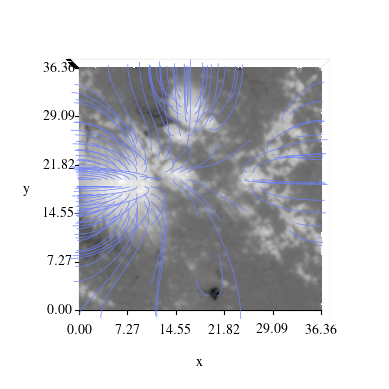

In [11]:
plot(data3d, False, 'los')

In [12]:
den = data3d.fdensity
pres = data3d.fpressure

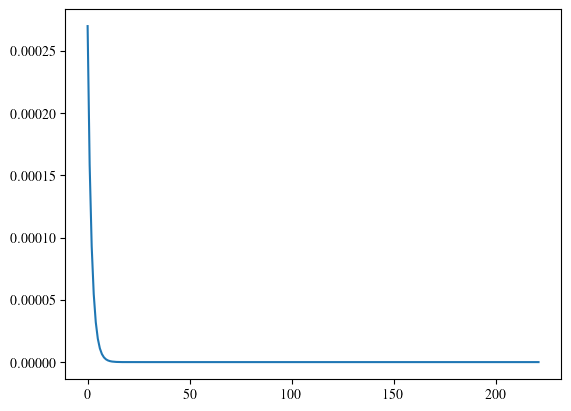

In [13]:
plt.plot(den[0,0,:])

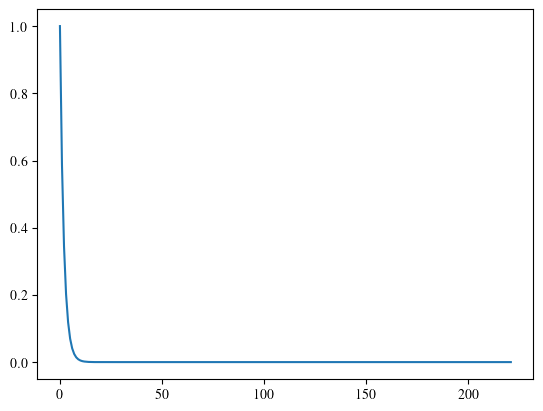

In [14]:
plt.plot(data3d.bdensity)

In [43]:
# SDO Example starts here

path = (
    "/Users/lilli/sunpy/data/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram.fits"
)

In [60]:
data2d = Field2dData.from_fits_SDO(path)

In [61]:
data2d.bz.shape

(398, 398)

In [62]:
data3d = calculate_magfield(data2d, 0, 1, 0, 2.0, 0.2)

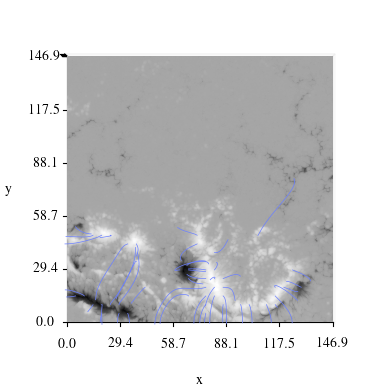

In [63]:
plot(data3d, False, 'los')

In [64]:
den = data3d.fdensity
pres = data3d.fpressure

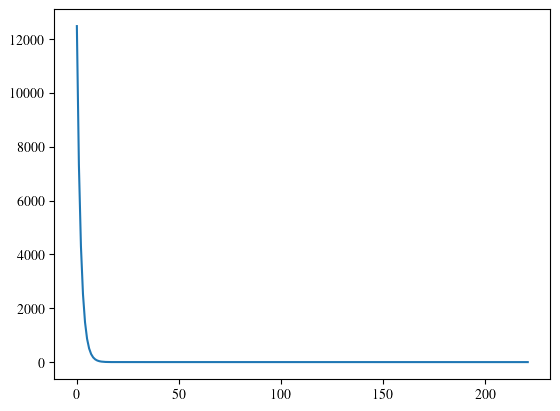

In [66]:
plt.plot(pres[0,0,:])